<a href="https://colab.research.google.com/github/TenofJiwon/Python/blob/main/Predict_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

thalach       5
trestbps      4
chol          1
sex_female    0
dtype: int64
1/1 [==============================] - 0s 190ms/step - loss: 0.7016 - accuracy: 0.6774
Test Accuracy 0.6774193644523621


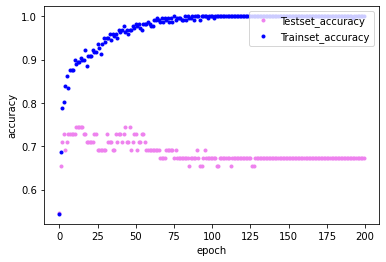

In [ ]:
#1_MissingValue
from keras.models import Sequential, load_model
from keras.layers import Dense,Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(3)
tf.random.set_seed(3)

targetURL='https://raw.githubusercontent.com/TenofJiwon/study/main/heart%20disease%20classification%20dataset.csv'
df = pd.read_csv(targetURL)

df=df.replace({'yes':1, 'no':0})
df=pd.get_dummies(df, columns=['sex'])
col1=df.columns[-2:].to_list()
col2=df.columns[1:-2].to_list()
new_col=col1+col2
df=df[new_col]

print(df.isnull().sum().sort_values(ascending=False).head(4))
df=df.fillna(df.mean())

standardization_df = ((df - df.mean()) / df.std())

x=standardization_df.iloc[:,:14]
y=df.iloc[:,14]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)

model = Sequential()
model.add(Dense(24, input_dim=14, activation='relu'))
model.add(Dense(20, activation='selu'))
model.add(Dense(10,activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback=EarlyStopping(monitor='val_accuracy', patience=20)

modelpath="./data/model/all/{epoch:02d}-{val_accuracy:4f}.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath, monitor='val_accuracy', verbose=0, save_best_only=True)

score=model.evaluate(x_test,y_test)
print('Test Accuracy', score[1])

history=model.fit(x_train, y_train, epochs=200, batch_size=10, verbose=0, validation_split=0.2)
hist_df=pd.DataFrame(history.history)

y_vaccuracy=hist_df['val_accuracy']
y_accuracy=hist_df['accuracy']

x_len=np.arange(len(y_accuracy))
plt.plot(x_len, y_vaccuracy, ".", c="violet", label='Testset_accuracy')
plt.plot(x_len, y_accuracy, ".", c="blue", label='Trainset_accuracy')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
#2_Kfold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

np.random.seed(3)
tf.random.set_seed(3)

targetURL='https://raw.githubusercontent.com/TenofJiwon/study/main/heart%20disease%20classification%20dataset.csv'
df = pd.read_csv(targetURL)

df=df.replace({'yes':1, 'no':0})
df=pd.get_dummies(df, columns=['sex'])
col1=df.columns[-2:].to_list()
col2=df.columns[1:-2].to_list()
new_col=col1+col2
df=df[new_col]

df=df.fillna(df.mean())

standardization_df = ((df - df.mean()) / df.std())

x=np.array(standardization_df.iloc[:,:14])
y=df.iloc[:,14]

k=6
kfold=KFold(n_splits=k, shuffle=True)

acc_score=[]

def model_fn():
  model = Sequential()
  model.add(Dense(24, input_dim=14, activation='selu'))
  model.add(Dense(20, activation='selu'))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1,activation='sigmoid'))
  return model

for train_index, test_index in kfold.split(x):
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model=model_fn()
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history=model.fit(x_train, y_train, epochs=200, batch_size=10, verbose=0)

  accuracy=model.evaluate(x_test, y_test)[1]
  acc_score.append(accuracy)

avg_acc_score=sum(acc_score)/k
print('정확도:',acc_score)
print('정확도 평균:', avg_acc_score)

2/2 [==============================] - 0s 6ms/step - loss: 0.8895 - accuracy: 0.7600
정확도: [0.9215686321258545, 0.8039215803146362, 0.843137264251709, 0.8199999928474426, 0.7599999904632568, 0.7599999904632568]
정확도 평균: 0.8181045750776926
